In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df_stack_overflow_2023 = pd.read_csv('survey_results_public.csv')
rates_df = pd.read_csv('/content/currency-rates.csv')

In [3]:
print("Shape of dataset:", df_stack_overflow_2023.shape)
df_stack_overflow_2023.head()
df_stack_overflow_2023.info()

Shape of dataset: (89184, 84)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11

In [4]:
#Calculate missing percentages for all columns
missing_percent = df_stack_overflow_2023.isnull().mean() * 100

#Filter to show only columns with >= 50% missing
missing_50plus = missing_percent[missing_percent >= 50].sort_values(ascending=False)

#Create DataFrame
missing_df = pd.DataFrame({
    'Column': missing_50plus.index,
    'MissingPercent': missing_50plus.values
})

#Format the percentages
missing_df['MissingPercent'] = missing_df['MissingPercent'].map('{:.2f}%'.format)

#Display results
print("Columns with 50% or more missing values:")
print(missing_df)


Columns with 50% or more missing values:
                                 Column MissingPercent
0                    AINextVery similar         97.06%
1                AINextSomewhat similar         93.01%
2   AINextNeither different nor similar         92.60%
3                  AINextVery different         85.80%
4                   AIDevWantToWorkWith         78.04%
5         AIToolNot interested in Using         76.38%
6              AINextSomewhat different         73.87%
7                   AIDevHaveWorkedWith         70.95%
8             AIToolInterested in Using         63.24%
9                 AIToolCurrently Using         59.48%
10                             Industry         58.77%
11                 LearnCodeCoursesCert         58.43%
12                                AIAcc         56.73%
13                          Frequency_3         53.97%
14                          Knowledge_8         53.57%
15                          Knowledge_7         53.50%
16                      

In [5]:
# Drop columns with > 70% because of too many missing data for those columns
cols_to_drop_70plus = missing_percent[missing_percent >= 70].index
df_stack_overflow_2023.drop(columns=cols_to_drop_70plus, inplace=True)

print(f"\n dropped {len(cols_to_drop_70plus)} columns with ≥ 70% missing values, new shape of cleaned dataset:{df_stack_overflow_2023.shape}")



 dropped 8 columns with ≥ 70% missing values, new shape of cleaned dataset:(89184, 76)


In [6]:
no_nulls = df_stack_overflow_2023.columns[df_stack_overflow_2023.isnull().mean() == 0]

print("columns with no missing values:", no_nulls.tolist())

columns with no missing values: ['ResponseId', 'Q120', 'MainBranch', 'Age']


In [7]:
irrelevant_cols = [
    'ResponseId', 'Q120', 'MainBranch', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq',
    'SOComm', 'SOAI', 'SurveyLength', 'SurveyEase','ConvertedCompYearly','PurchaseInfluence','TechList'
]

# Drop only the ones that exist in the DataFrame to avoid errors
df_stack_overflow_2023 = df_stack_overflow_2023.drop(
    columns=[col for col in irrelevant_cols if col in df_stack_overflow_2023.columns]
)

print(f"dropped {len(irrelevant_cols)} irrelevant columns, new shape of dataset: {df_stack_overflow_2023.shape}")
# --- Add This New Code to the End of the Cell ---

print("\n" + "="*50) # Adding a separator for clarity
print("Removing rows with missing currency information...")

# Keep track of the number of rows before filtering
original_rows = len(df_stack_overflow_2023)

# Drop rows where the 'Currency' column has a missing value (NaN)
df_stack_overflow_2023.dropna(subset=['Currency'], inplace=True)

# Report how many rows were removed
rows_removed = original_rows - len(df_stack_overflow_2023)
print(f"Removed {rows_removed} rows.")
print(f"New shape of the DataFrame: {df_stack_overflow_2023.shape}")
print("="*50)

dropped 14 irrelevant columns, new shape of dataset: (89184, 62)

Removing rows with missing currency information...
Removed 23850 rows.
New shape of the DataFrame: (65334, 62)


### Reasons for dropping irrelevant or low value columns

ResponseId	- Unique identifier, not useful for analysis or modeling.

MainBranch -	Nearly everyone answers the same (e.g. “I am a developer…”), so low variance.

NEWSOSites, SOVisitFreq, SOAccount, SOPartFreq, SOComm and SOAI - specific to Stack Overflow community behavior — only relevant for Stack Overflow usage studies.

ConvertedCompYearly - redundant feature with "CompTotal"

PurchaseInfluence - not relevant for the analysis

In [8]:
# Check for duplicate column names in the DataFrame
duplicate_cols = df_stack_overflow_2023.columns[df_stack_overflow_2023.columns.duplicated()].tolist()

if duplicate_cols:
    print(f"Detected {len(duplicate_cols)} duplicate column(s):")
    for col in duplicate_cols:
        print(f"  - {col}")
else:
    print("✅ No duplicate columns found in the dataset.")



✅ No duplicate columns found in the dataset.


In [9]:
#Handle Remaining Missing Values
categorical_columns = df_stack_overflow_2023.select_dtypes(include='object').columns

# Fill missing values in categorical columns with a placeholder
df_stack_overflow_2023[categorical_columns] = df_stack_overflow_2023[categorical_columns].fillna("NA")
df_stack_overflow_2023.head()


,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development..."
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NA,27,23,...,Agree,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development..."
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NA,12,7,...,Neither agree nor disagree,Agree,Agree,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NA
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,Agree,Strongly agree,Agree,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,...,Neither agree nor disagree,Disagree,Disagree,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other


In [10]:
df_stack_overflow_2023.dtypes

,0
Age,object
Employment,object
RemoteWork,object
CodingActivities,object
EdLevel,object
...,...
Frequency_3,object
TimeSearching,object
TimeAnswering,object
ProfessionalTech,object


In [11]:
#Display summary statistics for all numeric columns
numerical_summary = df_stack_overflow_2023.select_dtypes(include=['number']).describe()

# Show the result
print("Summary statistics for numerical columns:")
display(numerical_summary)


Summary statistics for numerical columns:


,CompTotal,WorkExp
count,4.822500e+04,40888.000000
mean,1.036807e+42,11.576526
std,2.276847e+44,9.032280
min,0.000000e+00,0.000000
25%,6.300000e+04,5.000000
50%,1.150000e+05,9.000000
75%,2.300000e+05,16.000000
max,5.000000e+46,50.000000


In [12]:
# Identify numerical columns
numerical_columns = df_stack_overflow_2023.select_dtypes(include=['number']).columns

# Count missing values in numerical columns
missing_numerical = df_stack_overflow_2023[numerical_columns].isnull().sum()

# Filter to show only columns with missing values
missing_numerical = missing_numerical[missing_numerical > 0]

# Display results
if not missing_numerical.empty:
    print("Missing values in numerical columns:")
    print(missing_numerical.sort_values(ascending=False))
else:
    print("No missing values in numerical columns.")

missing_numerical_percent = (df_stack_overflow_2023[numerical_columns].isnull().mean() * 100).round(2)

# Combine count and percent into one DataFrame
missing_numerical_summary = pd.DataFrame({
    'MissingCount': missing_numerical,
    'MissingPercent': missing_numerical_percent[missing_numerical.index]
})

print("Missing values in numerical columns (with percentage):")
print(missing_numerical_summary)



Missing values in numerical columns:
WorkExp      24446
CompTotal    17109
dtype: int64
Missing values in numerical columns (with percentage):
           MissingCount  MissingPercent
CompTotal         17109           26.19
WorkExp           24446           37.42


### For CompTotal

Do NOT use mean, compensation is often extremely skewed (some devs make $1M+, others <$20k). Instead, use median salary per role by country to fill the missing values.


In [13]:
comp_column = 'CompTotal'

# Fill missing CompTotal using median by DevType and Country
df_stack_overflow_2023[comp_column] = df_stack_overflow_2023.groupby(
    ['DevType', 'Country']
)[comp_column].transform(lambda group: group.fillna(group.median()))

# Fill remaining missing values with overall median
overall_median_comp = df_stack_overflow_2023[comp_column].median()
df_stack_overflow_2023[comp_column] = df_stack_overflow_2023[comp_column].fillna(overall_median_comp)

missing_remaining = df_stack_overflow_2023[comp_column].isnull().sum()
print(f"Missing values in '{comp_column}' after filling: {missing_remaining}")

Missing values in 'CompTotal' after filling: 0


In [14]:
# Create a new cell for this code after your other data cleaning steps

def clean_devtype_string(dev_string):
  # Check if the entry is a valid string
  if not isinstance(dev_string, str):
    return "NA" # Return a placeholder if not a string

  # Split the string by ';', strip whitespace from each part, and filter out 'NA'
  cleaned_roles = [
      role.strip() for role in dev_string.split(';') if role.strip() != 'NA'
  ]

  # If the list of roles is now empty, return 'NA', otherwise join them back
  if not cleaned_roles:
    return "NA"
  else:
    return ';'.join(cleaned_roles)

# Apply this function to the entire 'DevType' column
df_stack_overflow_2023['DevType'] = df_stack_overflow_2023['DevType'].apply(clean_devtype_string)

print("DevType column has been cleaned.")

DevType column has been cleaned.


### For WorkExp
Infer as max(YearsCodePro, YearsCode) since both are present, but need to convert YearsCode and YearsCodePro first to numberical values.

In [15]:
# Step 1: Convert YearsCode and YearsCodePro to numeric
def convert_experience(value):
    if pd.isna(value) or value == "NA":
        return np.nan
    if "Less than" in str(value):
        return 0.5
    if "More than" in str(value):
        return 51.0
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply conversion
df_stack_overflow_2023['YearsCode'] = df_stack_overflow_2023['YearsCode'].apply(convert_experience)
df_stack_overflow_2023['YearsCodePro'] = df_stack_overflow_2023['YearsCodePro'].apply(convert_experience)

# Step 2: Fill missing values with column median
median_years_code = df_stack_overflow_2023['YearsCode'].median()
df_stack_overflow_2023['YearsCode'] = df_stack_overflow_2023['YearsCode'].fillna(median_years_code)

median_years_code_pro = df_stack_overflow_2023['YearsCodePro'].median()
df_stack_overflow_2023['YearsCodePro'] = df_stack_overflow_2023['YearsCodePro'].fillna(median_years_code_pro)

# Step 3: Use cleaned YearsCode and YearsCodePro to infer WorkExp if missing
def infer_work_exp(row):
    if pd.isna(row['WorkExp']) and pd.notna(row['YearsCode']) and pd.notna(row['YearsCodePro']):
        return max(row['YearsCode'], row['YearsCodePro'])
    return row['WorkExp']

df_stack_overflow_2023['WorkExp'] = df_stack_overflow_2023['WorkExp'].apply(convert_experience)
df_stack_overflow_2023['WorkExp'] = df_stack_overflow_2023.apply(infer_work_exp, axis=1)

# Step 4: Fill any remaining WorkExp with median
median_work_exp = df_stack_overflow_2023['WorkExp'].median()
df_stack_overflow_2023['WorkExp'] = df_stack_overflow_2023['WorkExp'].fillna(median_work_exp)

# Final check
missing_remaining = df_stack_overflow_2023[['YearsCode', 'YearsCodePro', 'WorkExp']].isnull().sum()
print("Missing values remaining:")
print(missing_remaining)


Missing values remaining:
YearsCode       0
YearsCodePro    0
WorkExp         0
dtype: int64


In [16]:
df_stack_overflow_2023.Age.value_counts()

,count
Age,
25-34 years old,28619
35-44 years old,18411
45-54 years old,7314
18-24 years old,7117
55-64 years old,2829
65 years or older,729
Under 18 years old,167
Prefer not to say,148


### Understanding Age Distribution of the Respondents

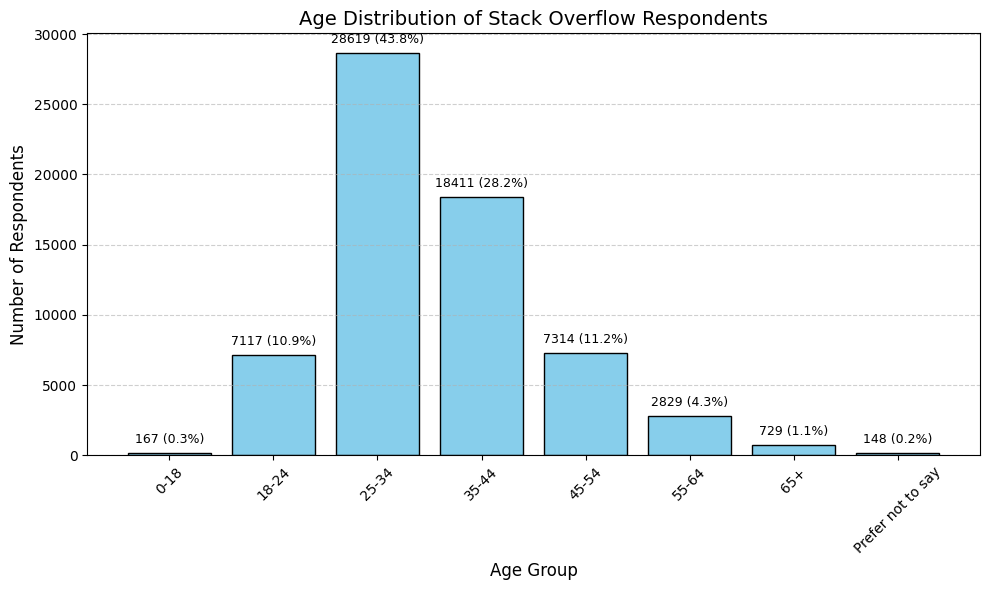

In [17]:
# Standardize Age categories
df_stack_overflow_2023['Age'] = df_stack_overflow_2023['Age'].str.strip()
df_stack_overflow_2023['Age'] = df_stack_overflow_2023['Age'].replace({
    'Under 18 years old': '0-18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': 'Prefer not to say'
})

# Define age group order
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']

# Count and reindex
age_counts = df_stack_overflow_2023['Age'].value_counts().reindex(age_order).fillna(0).astype(int)
total_respondents = age_counts.sum()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')

# Add count + percentage on top of bars
for bar, count in zip(bars, age_counts.values):
    percent = (count / total_respondents) * 100
    label = f"{count} ({percent:.1f}%)"
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, label,
             ha='center', va='bottom', fontsize=9)

# Labels and styling
plt.title('Age Distribution of Stack Overflow Respondents', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Working Arrangement

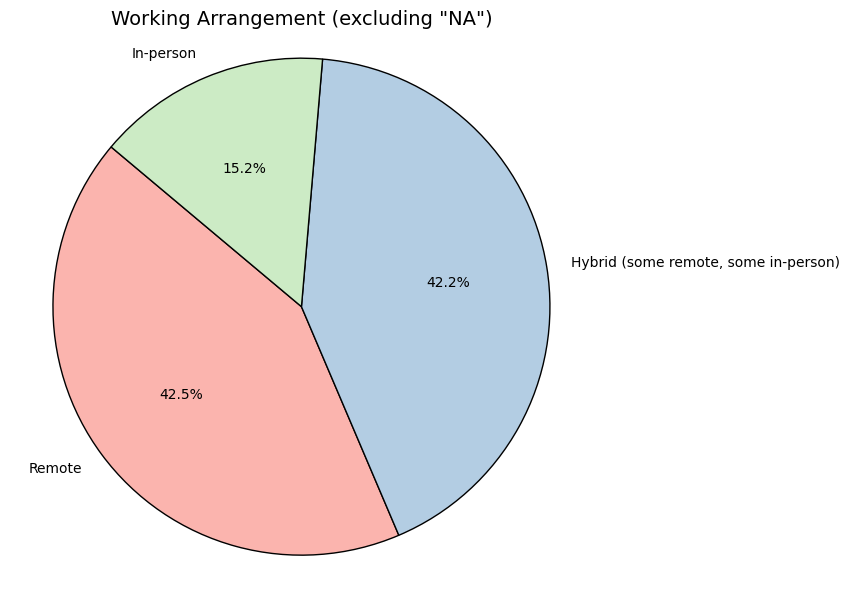

In [18]:
# Filter out both actual NaN and string "NA"
filtered_df = df_stack_overflow_2023[
    df_stack_overflow_2023['RemoteWork'].notna() &
    (df_stack_overflow_2023['RemoteWork'] != 'NA')
]

# Value counts for pie chart
remote_counts = filtered_df['RemoteWork'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(remote_counts.values,
        labels=remote_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Working Arrangement (excluding "NA")', fontsize=14)
plt.axis('equal')  # Ensures pie chart is circular
plt.tight_layout()
plt.show()


### Top 15 Countries of Respondents

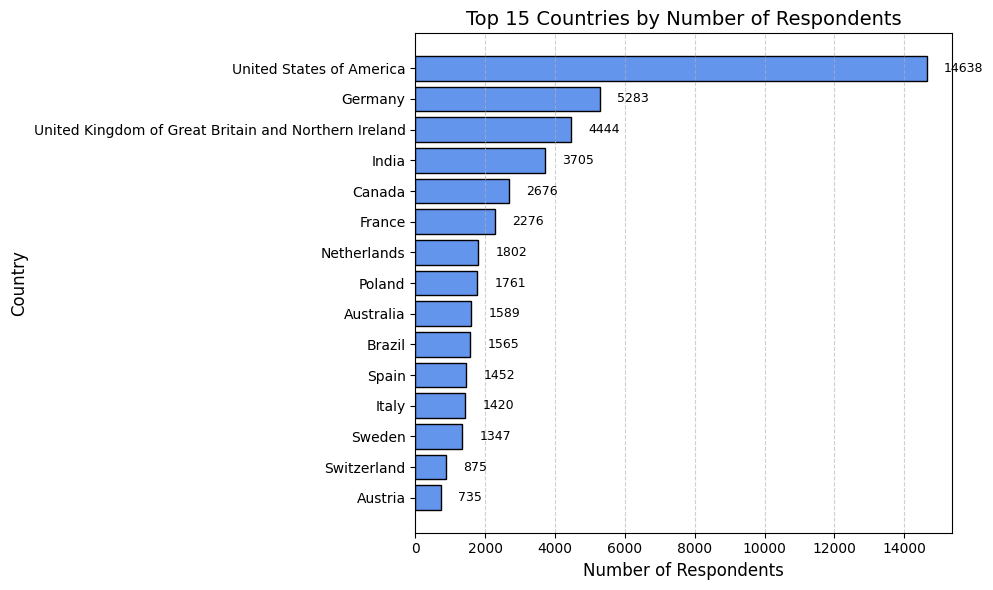

In [19]:
# Get the top 15 countries
country_counts = df_stack_overflow_2023['Country'].value_counts().head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(country_counts.index, country_counts.values, color='cornflowerblue', edgecolor='black')

# Add counts to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height() / 2, str(width),
             va='center', fontsize=9)

# Step 3: Customize the plot
plt.title('Top 15 Countries by Number of Respondents', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()  # Largest bar at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Educational Level of Respondents

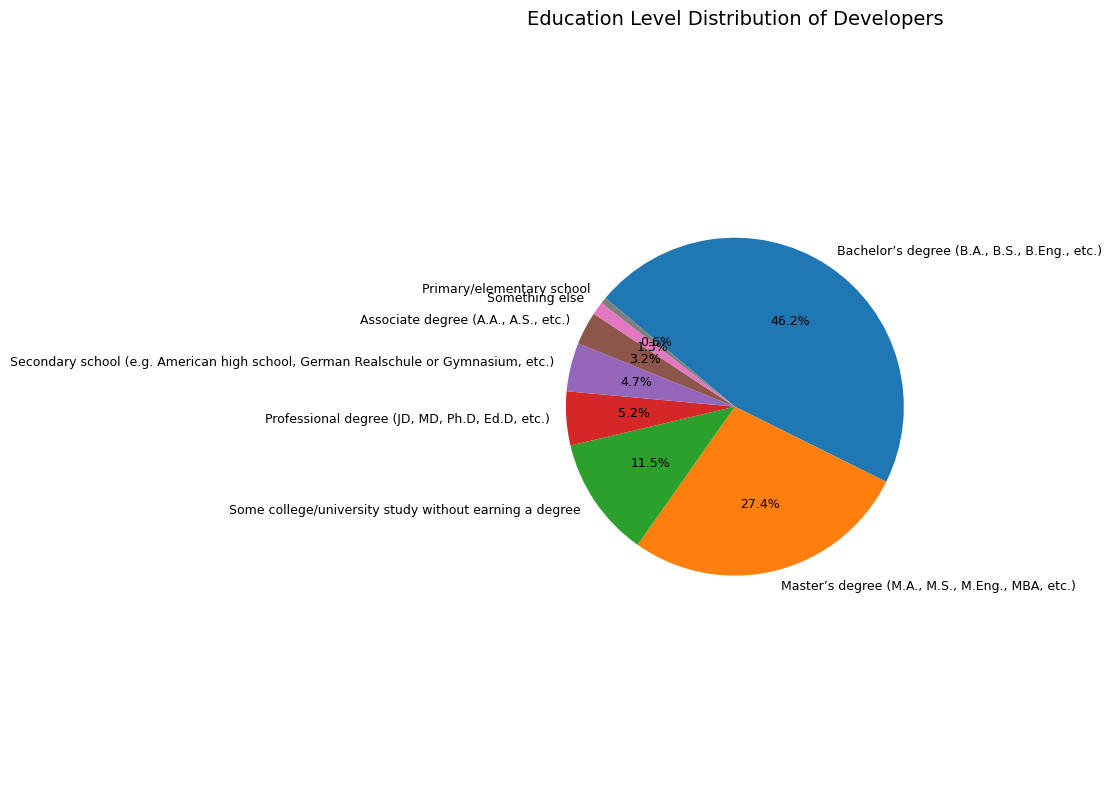

In [20]:

# Step 1: Clean and prepare EdLevel column
df_stack_overflow_2023['EdLevel'] = df_stack_overflow_2023['EdLevel'].astype(str).str.strip()

# Step 2: Count values and filter out missing or irrelevant data
ed_counts = df_stack_overflow_2023['EdLevel'].value_counts()

# Step 3: Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    ed_counts,
    labels=ed_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    textprops={'fontsize': 9}
)
plt.title('Education Level Distribution of Developers', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()


In [21]:
# Extract first 3 characters from the Currency column
df_stack_overflow_2023['Currency_Code'] = df_stack_overflow_2023['Currency'].astype(str).str[:3]

# Preview the result
df_stack_overflow_2023[['Currency', 'Currency_Code']].head()


,Currency,Currency_Code
1,USD\tUnited States dollar,USD
2,USD\tUnited States dollar,USD
3,USD\tUnited States dollar,USD
4,PHP\tPhilippine peso,PHP
5,GBP\tPound sterling,GBP


### Standardize the Salary to USD currency

In [22]:
# Step 1: Extract first 3 characters from Currency column
df_stack_overflow_2023['Currency_Code'] = df_stack_overflow_2023['Currency'].astype(str).str[:3]

# Step 2: Merge Rate_to_USD into df_stack_overflow_2023 based on Currency_Code
df_stack_overflow_2023 = pd.merge(
    df_stack_overflow_2023,
    rates_df[['Currency_Code', 'Rate_to_USD']],
    on='Currency_Code',
    how='left'
)

# Step 3: Compute CompTotalUSD = CompTotal / Rate_to_USD
df_stack_overflow_2023['CompTotalUSD'] = df_stack_overflow_2023.apply(
    lambda row: row['CompTotal'] / row['Rate_to_USD']
    if pd.notna(row['CompTotal']) and pd.notna(row['Rate_to_USD']) and row['Rate_to_USD'] != 0 else None,
    axis=1
)

# Optional: Preview result
df_stack_overflow_2023[['Currency', 'Currency_Code', 'CompTotal', 'Rate_to_USD', 'CompTotalUSD']].head()



,Currency,Currency_Code,CompTotal,Rate_to_USD,CompTotalUSD
0,USD\tUnited States dollar,USD,285000.0,1.000000,285000.000000
1,USD\tUnited States dollar,USD,250000.0,1.000000,250000.000000
2,USD\tUnited States dollar,USD,156000.0,1.000000,156000.000000
3,PHP\tPhilippine peso,PHP,1320000.0,56.767620,23252.692292
4,GBP\tPound sterling,GBP,78000.0,0.821191,94983.992762


In [23]:
# Step 1: Compute median salary in USD by employment role and country
role_country_median = (
    df_stack_overflow_2023
    .groupby(['Employment', 'Country'])['CompTotalUSD']
    .median()
    .reset_index()
    .rename(columns={'CompTotalUSD': 'Median_CompTotalUSD'})
)

# Step 2: Merge median salary back into main DataFrame
df_stack_overflow_2023 = df_stack_overflow_2023.merge(
    role_country_median,
    on=['Employment', 'Country'],
    how='left'
)

# Step 3: Fill missing CompTotalUSD with the corresponding group median
df_stack_overflow_2023['CompTotalUSD'] = df_stack_overflow_2023['CompTotalUSD'].fillna(
    df_stack_overflow_2023['Median_CompTotalUSD']
)

# Step 4: Fallback fill with overall median
overall_median = df_stack_overflow_2023['CompTotalUSD'].median()

df_stack_overflow_2023['CompTotalUSD'] = df_stack_overflow_2023['CompTotalUSD'].fillna(overall_median)

# Step 5: Drop helper column
df_stack_overflow_2023.drop(columns='Median_CompTotalUSD', inplace=True)

# Step 6: Report remaining nulls
missing_count = df_stack_overflow_2023['CompTotalUSD'].isna().sum()
print(f"Remaining missing values in 'CompTotalUSD': {missing_count}")
df_stack_overflow_2023[['Currency', 'Currency_Code', 'CompTotal', 'Rate_to_USD', 'CompTotalUSD']].head()

Remaining missing values in 'CompTotalUSD': 0


,Currency,Currency_Code,CompTotal,Rate_to_USD,CompTotalUSD
0,USD\tUnited States dollar,USD,285000.0,1.000000,285000.000000
1,USD\tUnited States dollar,USD,250000.0,1.000000,250000.000000
2,USD\tUnited States dollar,USD,156000.0,1.000000,156000.000000
3,PHP\tPhilippine peso,PHP,1320000.0,56.767620,23252.692292
4,GBP\tPound sterling,GBP,78000.0,0.821191,94983.992762


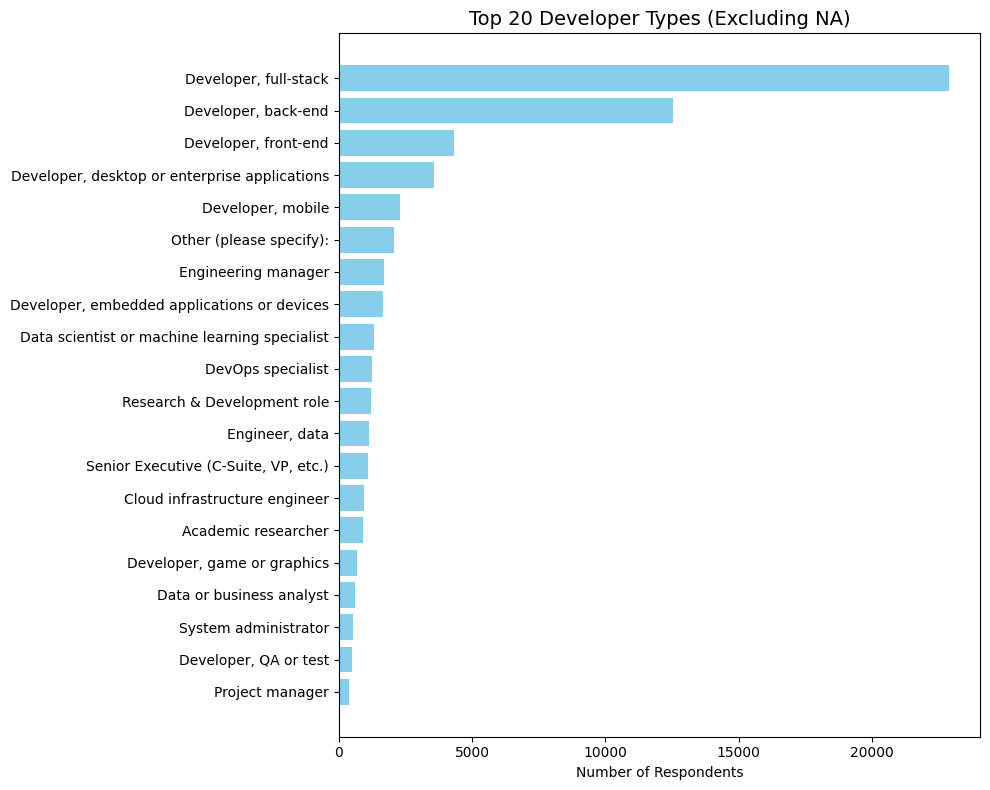

In [24]:
# Step 1: Filter out NaN and string "NA" from DevType
devtype_series = df_stack_overflow_2023['DevType']
devtype_cleaned = devtype_series[~devtype_series.isin([None, 'NA'])].dropna().str.split(';')

# Step 2: Flatten the list and count frequency
devtype_counts = Counter([dev.strip() for sublist in devtype_cleaned for dev in sublist])

# Step 3: Convert to DataFrame and get Top 20
devtype_df = pd.DataFrame(devtype_counts.items(), columns=['DevType', 'Count'])
devtype_df = devtype_df.sort_values(by='Count', ascending=False).head(20)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(devtype_df['DevType'], devtype_df['Count'], color='skyblue')
plt.gca().invert_yaxis()  # Highest at the top
plt.title('Top 20 Developer Types (Excluding NA)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.tight_layout()
plt.show()


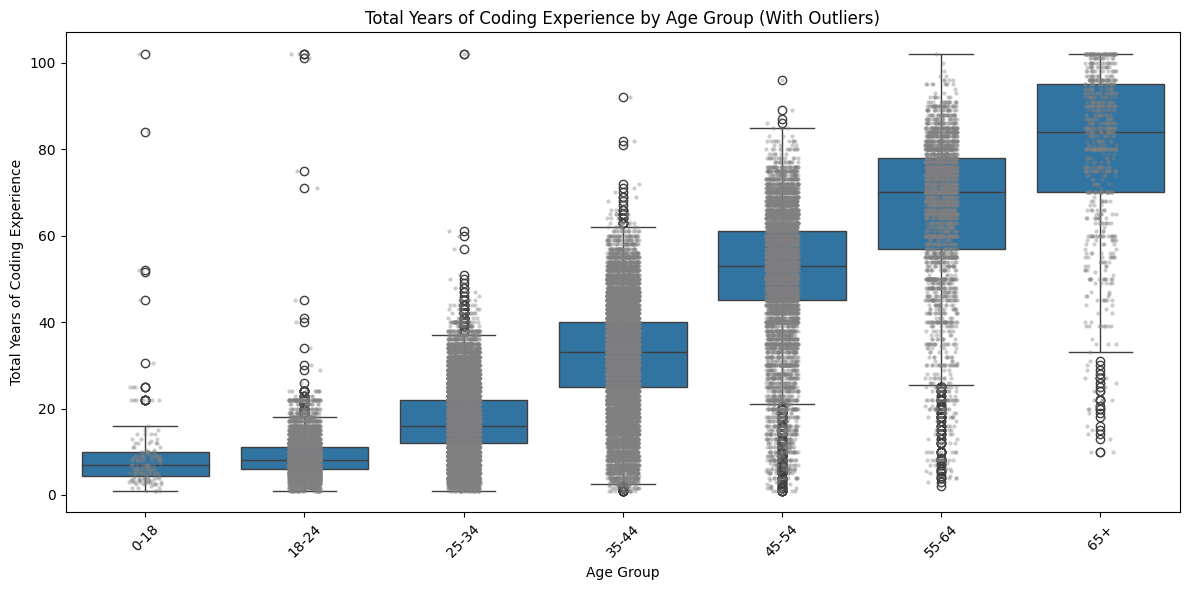

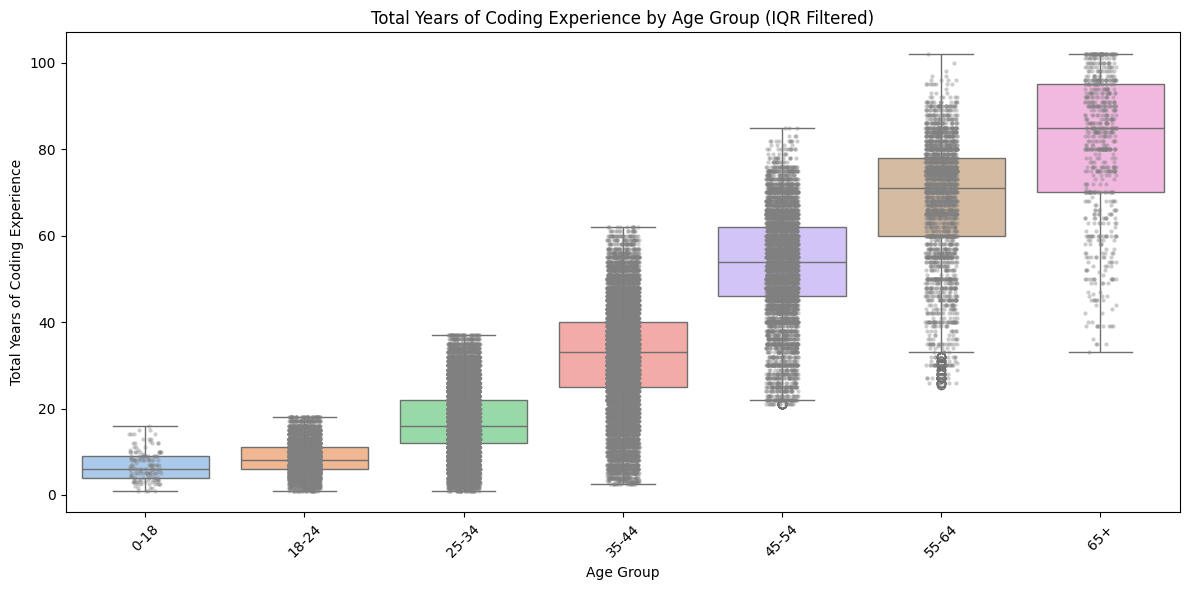

In [25]:
# Convert experience columns to numeric
df_stack_overflow_2023['YearsCode'] = pd.to_numeric(df_stack_overflow_2023['YearsCode'], errors='coerce')
df_stack_overflow_2023['YearsCodePro'] = pd.to_numeric(df_stack_overflow_2023['YearsCodePro'], errors='coerce')

# Combine total coding experience
df_stack_overflow_2023['Total_YearsCode'] = df_stack_overflow_2023[['YearsCode', 'YearsCodePro']].sum(axis=1, skipna=False)

# Standardize age groups
df_stack_overflow_2023['Age'] = df_stack_overflow_2023['Age'].replace({
    'Under 18 years old': '0-18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': None,
    'NA': None
}).str.strip()

# Drop missing values
df_viz = df_stack_overflow_2023.dropna(subset=['Total_YearsCode', 'Age'])

# Define age order
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# --- PLOT: With outliers ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_viz, x='Age', y='Total_YearsCode', order=age_order)

sns.stripplot(data=df_viz, x='Age', y='Total_YearsCode', order=age_order,
              jitter=True, size=3, color='gray', alpha=0.4)
plt.title('Total Years of Coding Experience by Age Group (With Outliers)')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Remove IQR Outliers ---
def remove_iqr_outliers(group):
    Q1 = group['Total_YearsCode'].quantile(0.25)
    Q3 = group['Total_YearsCode'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['Total_YearsCode'] >= lower) & (group['Total_YearsCode'] <= upper)]

# Remove outliers (exclude grouping column inside lambda to avoid deprecation warning)
df_viz_iqr = (
    df_viz.groupby('Age', group_keys=False)
    .apply(remove_iqr_outliers, include_groups=False)
    .assign(Age=lambda df: df_viz.loc[df.index, 'Age'])
)

# --- PLOT: Without outliers ---
plt.figure(figsize=(12, 6))

# Boxplot with pastel color
sns.boxplot(data=df_viz_iqr, x='Age', y='Total_YearsCode', order=age_order,
            hue= 'Age', palette='pastel', dodge=False, legend=False)

# Stripplot with smaller, transparent dots
sns.stripplot(data=df_viz_iqr, x='Age', y='Total_YearsCode', order=age_order,
              jitter=True, size=3, color='gray', alpha=0.4)

plt.title('Total Years of Coding Experience by Age Group (IQR Filtered)')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [26]:
# Drop the original 'CompTotal' column
df_stack_overflow_2023 = df_stack_overflow_2023.drop(columns=['CompTotal'])



In [27]:
# Create a boolean DataFrame that is True for any cell that is NaN OR the string 'NA'
is_missing = df_stack_overflow_2023.isnull() | (df_stack_overflow_2023 == 'NA')

# Calculate the percentage of missing values based on this new condition
missing_percent = is_missing.mean() * 100

# Filter to show only columns with a missing percentage greater than 0
columns_with_na_percent = missing_percent[missing_percent > 0]

if columns_with_na_percent.empty:
    print("✅ No missing values (including 'NA' strings) were found.")
else:
    # Create a DataFrame for cleaner formatting
    missing_df = pd.DataFrame({
        'Column': columns_with_na_percent.index,
        'Missing_Percentage': columns_with_na_percent.values
    })

    # Format the percentage to two decimal places with a '%' sign
    missing_df['Missing_Percentage'] = missing_df['Missing_Percentage'].map('{:.2f}%'.format)

    # Sort to show the most problematic columns first
    missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

    print("Columns with missing values (including 'NA' strings):")
    # Use .to_string() for a clean print without the DataFrame index
    print(missing_df.to_string(index=False))

Columns with missing values (including 'NA' strings):
                        Column Missing_Percentage
        LanguageWantToWorkWith              8.27%
         OpSysProfessional use              7.50%
     AIToolInterested in Using             64.35%
         AIToolCurrently Using             60.90%
                       TBranch              6.11%
                         AIAcc             58.33%
          LearnCodeCoursesCert             56.96%
        AISearchWantToWorkWith             50.76%
                      Industry             47.15%
        MiscTechWantToWorkWith             46.23%
                   Frequency_3             41.04%
                   Knowledge_8             40.55%
                   Knowledge_7             40.45%
                   Knowledge_6             40.38%
                   Knowledge_5             40.37%
                   Knowledge_2             40.19%
                   Knowledge_4             40.16%
                   Knowledge_3             40.

In [28]:
# Display the first 5 rows to show all columns with sample data
df_stack_overflow_2023.head()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,Currency_Code,Rate_to_USD,CompTotalUSD,Total_YearsCode
0,25-34,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18.0,9.0,...,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",USD,1.000000,285000.000000,27.0
1,45-54,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NA,27.0,23.0,...,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",USD,1.000000,250000.000000,50.0
2,25-34,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NA,12.0,7.0,...,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NA,USD,1.000000,156000.000000,19.0
3,25-34,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6.0,4.0,...,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,PHP,56.767620,23252.692292,10.0
4,35-44,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21.0,21.0,...,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,GBP,0.821191,94983.992762,42.0


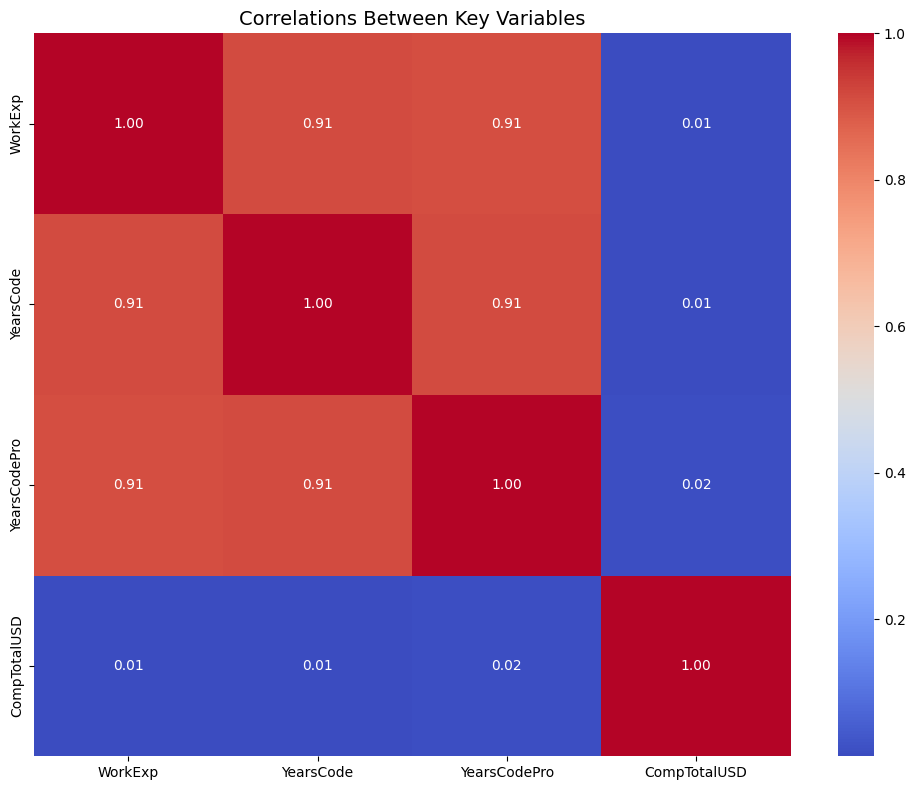

In [29]:

# Step 1: Select the final numerical columns for the analysis
numerical_cols = ['WorkExp', 'YearsCode', 'YearsCodePro', 'CompTotalUSD']
correlation_df = df_stack_overflow_2023[numerical_cols].copy()

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Step 3: Create the heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,      # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a diverging color scheme
    fmt='.2f'        # Format the annotations to two decimal places
)

# Step 4: Add a title and display the plot
plt.title('Correlations Between Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

In [30]:

# Step 1: Select the base features for your model
features_to_include = [
    'YearsCodePro',  # Our selected numerical feature for experience
    'EdLevel',       # A key categorical feature
    'Country'        # Another key categorical feature
]

# Create a new DataFrame with only these columns to keep things clean
model_df = df_stack_overflow_2023[features_to_include].copy()

# Step 2 (Optional but Recommended): To prevent creating too many columns,
# let's only use the top 10 countries and group the rest into an 'Other' category.
top_10_countries = df_stack_overflow_2023['Country'].value_counts().nlargest(10).index
model_df.loc[~model_df['Country'].isin(top_10_countries), 'Country'] = 'Other'


# Step 3: Convert the categorical columns into numerical format
X = pd.get_dummies(model_df, columns=['EdLevel', 'Country'], drop_first=True)

# Step 4: Define your target variable
y = df_stack_overflow_2023['CompTotalUSD']

# Display the final features (X) ready for the model
print("--- Final Features (X) after One-Hot Encoding ---")
print(f"The feature set now has {X.shape[1]} columns.")
print(X.head())

--- Final Features (X) after One-Hot Encoding ---
The feature set now has 18 columns.
   YearsCodePro  EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
0           9.0                                               True      
1          23.0                                               True      
2           7.0                                               True      
3           4.0                                               True      
4          21.0                                              False      

   EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   EdLevel_Primary/elementary school  \
0                              False   
1                     

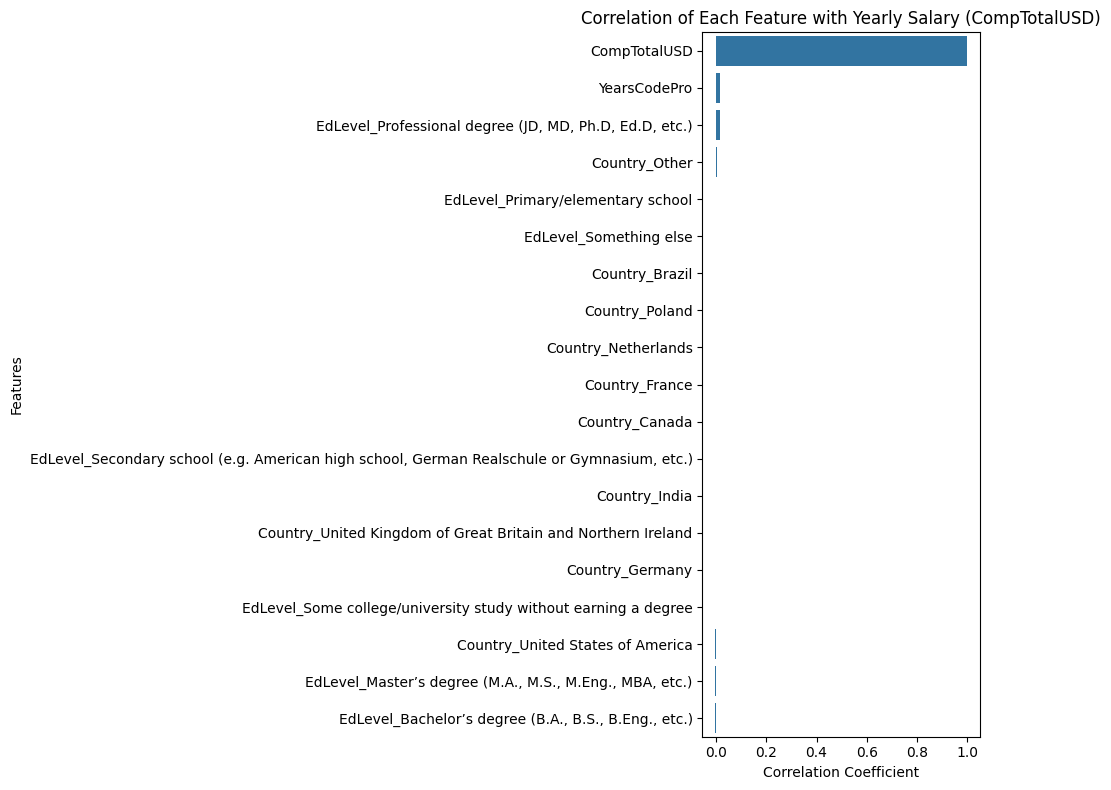

In [31]:

# Step 1: Combine your features (X) and target (y) into a single DataFrame
# This is necessary to calculate the correlations between them.
temp_df = pd.concat([X, y], axis=1)

# Step 2: Calculate the correlation matrix
correlation_matrix = temp_df.corr()

# Step 3: Isolate the correlations of each feature with 'CompTotalUSD'
corr_with_target = correlation_matrix['CompTotalUSD'].sort_values(ascending=False)

# Step 4: Visualize these correlations as a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation of Each Feature with Yearly Salary (CompTotalUSD)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()